# **Gayrimenkul Satış Fiyatı Tahmini**
## 'house' Data Set **:**
Çeşitli evlerin Satış Fiyatları ve ilgili evlerin çeşitli özelliklerinin olduğu bir Veri Setidir...
<br> Bu evlerin çeşitli özelliklerinin ayrıntılı bilgilerini içeren de bir TXT dosyamız var... Bu dosyanın adı da **, '``house_data_description.txt``'**'dir... Bu dosyaya bakarak **,** Veri Setimiz ile ilgili daha ayrıntılı bilgiye sahip olabiliriz...

<br>

Bu Veri Seti ile **,** Evlerin Özellikleri ile Satış Fiyatları arasında bir ilişki kurmaya çalışacağım... Ve GERÇEK Hayatta da **,** herhangi bir Evin Özelliklerine göre **,** bir Satış Fiyatı TAHMİNİ yapmaya çalışacağım...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
house = pd.read_csv("house.csv" , index_col=0)
print(house.head())
print(house.shape)

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

### Öncelikle **, Veri Ön İşleme** ile başlayalım **:**

In [3]:
house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Yukarıdaki Kolonlara ve Tiplerine baktığımızda **;**
+ Mesela ilk kolon olan **'MSSubClass'** kolonu **'Numerik'** bir kolon olarak tanımlanmış... Ama **'Description'** isimli dosyamıza baktığımızda **, Numerik** olan o değerlerin her birisine bir tanım yapılmış. Yani o **Numerik** değerlerin hepsi bir **Kategoriyi** simgeliyor... Yani bu kolonun Sayısal Değerlerinin herhangi bir **Numerik** anlamı YOK **!** Onun için de bu kolonu **'Kategorik'** hale çevirmem gerekiyor **:**

In [4]:
house.MSSubClass = house.MSSubClass.astype("str")
house.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

+ Şimdi de **, NaN** değerleri (Eksik Verileri) bulalım ve yerlerine atamalar yapalım **:**

In [5]:
house.isnull().sum().sum()

6965

In [6]:
house.isnull().sum()[house.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
miss_percent = house.isnull().mean()[house.isnull().sum() > 0]
miss_percent = miss_percent[miss_percent > 0.0001].sort_values(ascending=False)
miss_percent*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [8]:
ev = house.copy()

In [9]:
ev.MasVnrType = ev.MasVnrType.fillna("None")
ev.MasVnrArea = ev.MasVnrArea.fillna(0)
ev.BsmtQual = ev.BsmtQual.fillna("None")
ev.BsmtCond = ev.BsmtCond.fillna("None")
ev.BsmtExposure = ev.BsmtExposure.fillna("None")
ev.BsmtFinType1 = ev.BsmtFinType1.fillna("None")
ev.BsmtFinType2 = ev.BsmtFinType2.fillna("None")
ev.Electrical = ev.Electrical.fillna("None") 
ev.GarageType = ev.GarageType.fillna("None")
ev.GarageYrBlt = ev.GarageYrBlt.fillna(0)
ev.GarageFinish = ev.GarageFinish.fillna("None")
ev.GarageQual = ev.GarageQual.fillna("None")
ev.GarageCond = ev.GarageCond.fillna("None")
ev["LotFrontage"] = ev.LotFrontage.fillna(0)
ev["Alley"] = ev.Alley.fillna("None")
ev["FireplaceQu"] = ev.FireplaceQu.fillna("None")
ev["PoolQC"] = ev.PoolQC.fillna("None")
ev["Fence"] = ev.Fence.fillna("None")
ev["MiscFeature"] = ev.MiscFeature.fillna("None")

In [10]:
ev.isnull().sum().sum()

0

+ Belirleyeceğimiz bir **Threshold** ile **,** Kolonlarımızdaki bazı Kategorileri Birleştirelim **...**
<br> **(** Aksi takdirde **,** çok fazla Kolonumuz olacağı için **,** modelimizin OVERFIT etme ihtimali artacak... **)**
+ Öncelikle **,** Kategorik Değişkenleri görelim... **:** 

In [11]:
categorical_cols = [col for col in ev.columns if ev[col].dtype == 'O']
categorical_cols

# Yukarıdaki ; aşağıdakinin aynısının kısa halidir...

# for col in ev.columns :
#   if ev[col].dtype == 'O' :
#     print(col)

# NOTE :: 'O' = 'Object'

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
ev.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [13]:
ev.MSSubClass.value_counts()/len(ev) * 100

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

+ Şimdi de yukarıda bulduğum **,** Kategorik Değişkenlerin içerilerindeki bazı Kategorileri **,** belirlediğimiz **Threshold**'a göre **Birleştirelim :**

In [14]:
thr = 0.01


for col in categorical_cols:
    
    category_percent = ev[col].value_counts() / len(ev)
    category = list(category_percent[category_percent < thr].index)
  #   Bir Kolonda Threshold uygulandıktan sonra ; '2''den daha az Kategori
  # kalmış ise zaten orada bir birleştirme yapmaya gerek kalmıyor...
  # Onun için ; en az 2 adet Kategori olmalı ki , bir Birleştirme işlemi yapabilelim... :
    if len(category) > 1:
        ev[col].replace(category , 'Other' , inplace=True)

In [15]:
ev.MSSubClass.unique()

array(['60', '20', '70', '50', '190', 'Other', '90', '120', '30', '85',
       '80', '160', '75'], dtype=object)

In [16]:
ev.MSSubClass.value_counts()/len(ev) * 100

20       36.712329
60       20.479452
50        9.863014
120       5.958904
30        4.726027
160       4.315068
70        4.109589
80        3.972603
90        3.561644
190       2.054795
Other     1.780822
85        1.369863
75        1.095890
Name: MSSubClass, dtype: float64

+ Şimdi de **, Ordinal (Sıralı , Sırasal)** bir Değişken olan **'ExterQual'** Kolonu için bir **Label Encoder** işlemi gerçekleştirelim **:**

In [17]:
ev.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [18]:
ev.ExterQual = ev.ExterQual.replace({'Fa':1 , 'TA':2 , 'Gd':3 , 'Ex':4})
ev.ExterQual.unique()

array([3, 2, 4, 1], dtype=int64)

+ Şimdi de **, NaN** değerleri doldurduktan ve bazı Kategorik Değişkenlerin Kategorilerini birleştirdikten sonra **;** bu Kategorik değişkenleri **Dummy Değişken** hale çevirelim... **:**

In [19]:
ev.shape

(1460, 80)

In [20]:
ev_dummy = pd.get_dummies(ev , drop_first=True)
ev_dummy.shape

(1460, 215)

+ Yapılması gereken ideal şeylerden birisi de her bir değişkenin **Varyansına** bakmaktır. Yani değişkenler bir değişkenlik gösteriyor mu diye bakacağım. Eğer **Varyans** istediğim **Threshold**'un altında ise O değişken benim istediğim kadar bilgiye sahip değildir demek olacak... Ve istersem o Değişkeni (Kolonu) Veri Setinden çıkaracağım...

**+--- NOTE --->** Bu teknik ile **;** OUTPUT'dan yani **'y'**'den bağımsız olarak **,** sadece Değişkenlere bakarak bir işlem gerçekleştiriyorum...

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
y = ev_dummy['SalePrice']
X = ev_dummy.drop('SalePrice' , axis=1)
X.shape

(1460, 214)

In [23]:
selector = VarianceThreshold(0.01).fit(X)

X = selector.transform(X)
X.shape

(1460, 198)

**+--- NOTE --->** Ayrıca **; "Select 'K' Best" , "Select From Model" , "Recursive Feature Elimination" , ...** gibi farklı **Feature Selection** Tekniklerini de kullanabilirdim... Birkaç tanesini beraber de kullanabilirdim... Ama ben burada sadece **"Variance Threshold"** Tekniğini tercih ettim...

+ ### Şimdiye kadar ki yaptığım tüm **Veri Seti Düzenleme ve Veri Ön İşleme** işlemlerinden sonra artık **Modelimizi** kurmaya başlayabilirim... **:**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statistics

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=92)

scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X_train)

X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [32]:
pipe = Pipeline([('scaler', preprocessing.StandardScaler()) , ('Regressor', LinearRegression())])

search_space = [
    { 'Regressor': [XGBRegressor()] ,
                 'Regressor__n_estimators': [100 , 1000 , 5000 , 10000] ,
                 'Regressor__learning_rate': [1 , 0.1 , 0.01 , 0.001] }    
               ]

grid = GridSearchCV(pipe , search_space , cv=5 , verbose=2 , scoring='neg_mean_squared_error' , n_jobs=-1)
best_model = grid.fit(X_train , y_train)
print(best_model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'Regressor': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), 'Regressor__learning_rate': 0.001, 'Regressor__n_estimators': 10000}


**+--- NOTE --->** Yukarıda **,** daha farklı modelleme tekniklerini aynı anda deneyebilirdim... Ama programın daha hızlı çalışması için ve aynı zamanda Veri Setinin yapısından dolayı öncelikle **XGBRegressor** tekniğini tercih ettim...

Yukarıda gördüğümüz gibi **,** en iyi teknik **XGBRegressor** tekniği imiş... En iyi parametreleri de **,** aşağıdaki gibiymiş... **:**

In [26]:
model = XGBRegressor(n_estimator=10000 , learning_Rate=0.001)

model.fit(X_trainStandard , y_train)

y_pred = model.predict(X_testStandard)

scores = cross_val_score(model , X_trainStandard , y_train , cv=10 , scoring='r2')

[06:08:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:08:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:08:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a fa

In [27]:
results = pd.DataFrame([] , columns=["'r2' Mean" , "'r2' Median" , "'r2' STD"])

results.loc['XGBRegressor'] = [scores.mean() , statistics.median(scores) , scores.std()]
results

,'r2' Mean,'r2' Median,'r2' STD
XGBRegressor,0.85384,0.875513,0.067874


+ Şimdi de **'PCA( )'** Tekniğini deneyelim **:**

198


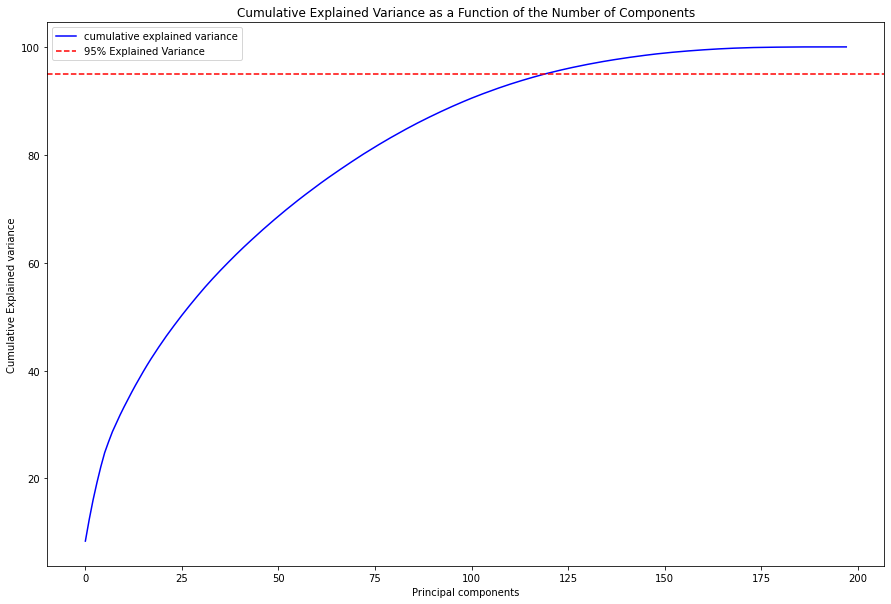

In [28]:
pca = PCA()
pca.fit(X_trainStandard)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
print(len(cumsum))
d = [n for n in range(len(cumsum))]

plt.figure(figsize=(15, 10))
plt.plot(d , cumsum , color='blue' , label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y=95 , color='r' , linestyle='--' , label='95% Explained Variance')
plt.legend(loc='best')

In [29]:
pca = PCA(n_components = .95)
pca.fit(X_trainStandard)

X_trainPCA = pca.transform(X_trainStandard)

score = cross_val_score(model , X_trainPCA , y_train ,  cv=10 , scoring='r2')

[06:08:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:08:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:08:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learning_Rate", "n_estimator" } might not be used.

  This could be a fa

In [30]:
results.loc['PCA'] = [score.mean() , statistics.median(score) , score.std()]
results

,'r2' Mean,'r2' Median,'r2' STD
XGBRegressor,0.853840,0.875513,0.067874
PCA,0.827016,0.859813,0.066546


Yukarıdaki **$R^2$** sonuçlarından da gördüğümüz gibi **,** bu Veri Seti için **XGBRegressor** tekniği biraz daha iyi çalışıyor...
<br> Yani kurduğum bu model **;** herhangi bir evin özelliklerine bakarak **, %85-%88** başarıyla satış fiyatını doğru tahmin edebiliyor.